## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, auc

# read and look at data
edu = pd.read_csv('https://raw.githubusercontent.com/wchen952/STAT-303-2-Project/main/data/xAPI-Edu-Data.csv')
edu

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### Data quality check
*By Jason*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [2]:
# Check for any na values in the dataset
check_nan = edu.isna().sum()
print(check_nan)

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [3]:
# check the correlation between variables
edu.corr()

/var/folders/rg/4sg2sg2n5d17g_zrymb0d2fw0000gn/T/ipykernel_76984/1908083368.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  edu.corr()


,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


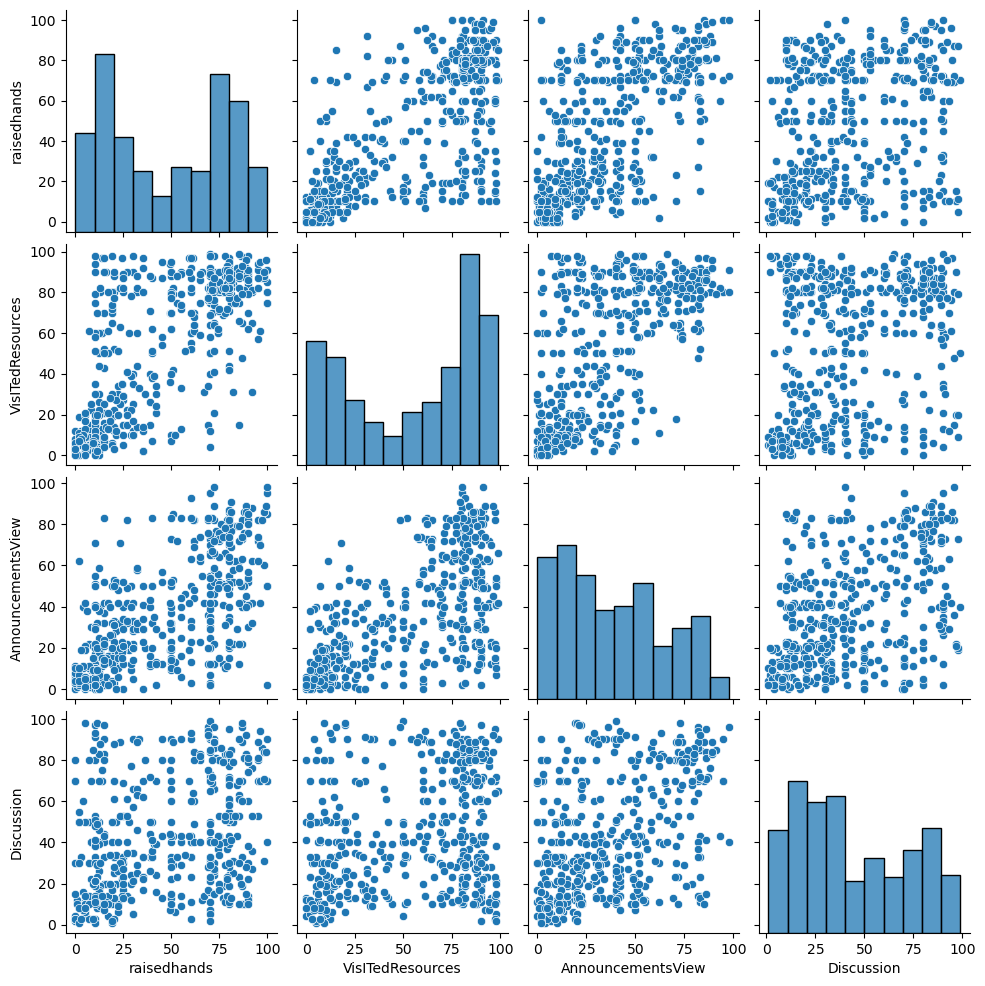

In [4]:
# adding pairplot to help with visualization
sns.pairplot(edu)

### Data cleaning
*By Xena Valenzuela*

From the data quality check we realized that:
...

The code below implements the above cleaning.

In [8]:
#We realized that we needed to make a subset of the training dataset in order to make a feasable training and testing dataset
edu_train = edu.copy()
edu_train.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [9]:
# drop stageID, sectionID, semester, relation, parentansweringsurvey, parentschoolsatisfaction, all values that were categorical were dropped 
edu_train = edu_train.drop(['NationalITy', 'PlaceofBirth', 'StageID', 'SectionID', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction'], axis = 1)
edu_train.head(5)

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,G-04,IT,15,16,2,20,Under-7,M
1,M,G-04,IT,20,20,3,25,Under-7,M
2,M,G-04,IT,10,7,0,30,Above-7,L
3,M,G-04,IT,30,25,5,35,Above-7,L
4,M,G-04,IT,40,50,12,50,Above-7,M


In [19]:
#we wanted to see the distribution of the topics to see if there were relatively well distributed
edu_train['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [20]:
# drop English topic because there are only two observations 
edu_train = edu_train[edu_train.Topic != 'English']
edu_train

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,G-04,IT,15,16,2,20,Under-7,M
1,M,G-04,IT,20,20,3,25,Under-7,M
2,M,G-04,IT,10,7,0,30,Above-7,L
3,M,G-04,IT,30,25,5,35,Above-7,L
4,M,G-04,IT,40,50,12,50,Above-7,M
...,...,...,...,...,...,...,...,...,...
475,F,G-08,Chemistry,5,4,5,8,Above-7,L
476,F,G-08,Geology,50,77,14,28,Under-7,M
477,F,G-08,Geology,55,74,25,29,Under-7,M
478,F,G-08,History,30,17,14,57,Above-7,L


In [21]:
#applying the same logic from topics to class 
edu_train['Class'].value_counts()

M    193
H    125
L    117
Name: Class, dtype: int64

In [23]:
# drop low since we want to make a logistical regression and a binary response variable 
edu_train = edu_train[edu_train.Class != 'L']
edu_train.head(5)

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,G-04,IT,15,16,2,20,Under-7,M
1,M,G-04,IT,20,20,3,25,Under-7,M
4,M,G-04,IT,40,50,12,50,Above-7,M
5,F,G-04,IT,42,30,13,70,Above-7,M
7,M,G-07,Math,50,10,15,22,Under-7,M


### Data preparation
*By Sankaranarayanan Balasubramanian and Chun-Li*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [26]:
#This makes the class an official response variable
edu_train['Class'].replace(to_replace = {'M': 0, 'H': 1}, inplace = True)
edu_train.head(5)

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,G-04,IT,15,16,2,20,Under-7,0
1,M,G-04,IT,20,20,3,25,Under-7,0
4,M,G-04,IT,40,50,12,50,Above-7,0
5,F,G-04,IT,42,30,13,70,Above-7,0
7,M,G-07,Math,50,10,15,22,Under-7,0


In [57]:
#In the idea that we want to prepare our data for subset selection, it was necessary to make sure that we can perform it using dummy variables
edutrain_dummies = pd.get_dummies(edu_train)
edutrain_dummies.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G-02,GradeID_G-04,GradeID_G-06,...,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,20,20,3,25,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,40,50,12,50,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
5,42,30,13,70,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
7,50,10,15,22,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [58]:
#since the names can cause problems in the regression process, I renamed them to be more model friendly
Y = [s.replace('-', '_') for s in edutrain_dummies.columns.to_list()]
edutrain_dummies.columns = Y
edutrain_dummies.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G_02,GradeID_G_04,GradeID_G_06,...,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,StudentAbsenceDays_Above_7,StudentAbsenceDays_Under_7
0,15,16,2,20,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,20,20,3,25,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,40,50,12,50,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
5,42,30,13,70,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
7,50,10,15,22,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.